# Breast Cancer Detection

## Preprocessing

* Number of instances: 569

* Number of attributes: 32

* Attribute information:
   
   1) ID number

   2) Diagnosis (M = malignant, B = benign)
3-32)


Ten real-valued features are computed for each cell nucleus:

  a) radius (mean of distances from center to points on the perimeter)

  b) texture (standard deviation of gray-scale values)

  c) perimeter

  d) area

  e) smoothness (local variation in radius lengths)

  f) compactness (perimeter^2 / area - 1.0)

  g) concavity (severity of concave portions of the contour)

  h) concave points (number of concave portions of the contour)

  i) symmetry

  j) fractal dimension ("coastline approximation" - 1)


* Missing attribute values: None

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  Import and read the breast-cancer.data.csv.
df = pd.read_csv("../Resources/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

In [3]:
# Find null values
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column id has 0 null values
Column diagnosis has 0 null values
Column radius_mean has 0 null values
Column texture_mean has 0 null values
Column perimeter_mean has 0 null values
Column area_mean has 0 null values
Column smoothness_mean has 0 null values
Column compactness_mean has 0 null values
Column concavity_mean has 0 null values
Column concave_points_mean has 0 null values
Column symmetry_mean has 0 null values
Column fractal_dimension_mean has 0 null values
Column radius_se has 0 null values
Column texture_se has 0 null values
Column perimeter_se has 0 null values
Column area_se has 0 null values
Column smoothness_se has 0 null values
Column compactness_se has 0 null values
Column concavity_se has 0 null values
Column concave_points_se has 0 null values
Column symmetry_se has 0 null values
Column fractal_dimension_se has 0 null values
Column radius_worst has 0 null values
Column texture_worst has 0 null values
Column perimeter_worst has 0 null values
Column area_worst has 0 null 

In [4]:
# Find duplicate entries
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


In [5]:
df.shape

(569, 32)

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
# Choose a cutoff value and create a list of diagnosis to be replaced
# use the variable name `diagnosis_to_replace`

# Transform diagnosis
def diagnosis_to_replace(diagnosis):
    if diagnosis == "M":
        return 1
    else:
        return 0
    

df["diagnosis"] = df["diagnosis"].apply(diagnosis_to_replace)
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [8]:
# Split our preprocessed data into our features and target arrays also drop the id as that is not useful
X = df.drop(["diagnosis", "id"], axis='columns')
y = df["diagnosis"]
X                   

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Explore the dataset

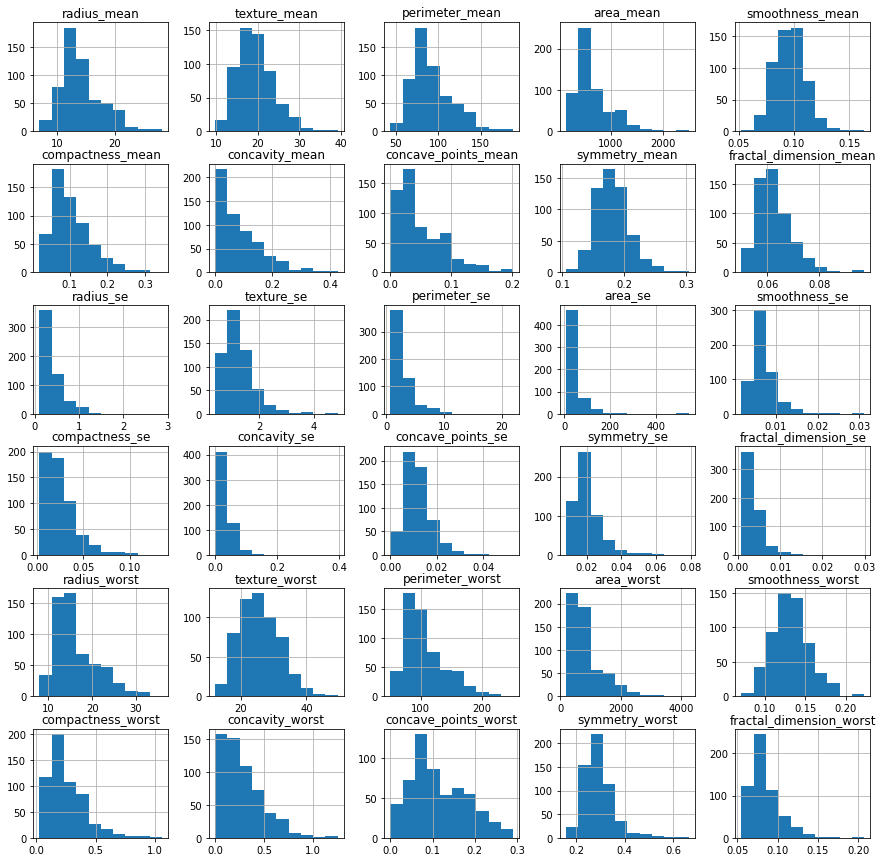

In [9]:
# A quick look at the features to see if the data is distributed normally or not
X.hist(figsize=(15,15))
plt.show()

There is a significant number of features that have a strong right skew, so for some models the data will need to be transformed.

In [10]:
benign = df.loc[df['diagnosis']==0]
benign.drop(columns=['id','diagnosis'], inplace=True)

C:\Users\drami\AppData\Local\Temp\ipykernel_36552\4095381791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign.drop(columns=['id','diagnosis'], inplace=True)


In [11]:
benign

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [12]:
malign = df.loc[df['diagnosis']==1]
malign.drop(columns=['id','diagnosis'], inplace=True)

C:\Users\drami\AppData\Local\Temp\ipykernel_36552\406327306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malign.drop(columns=['id','diagnosis'], inplace=True)


In [13]:
malign

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


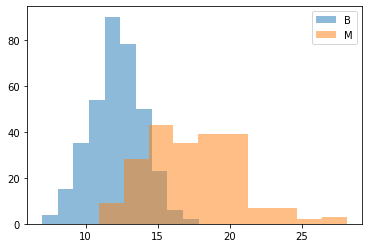

In [14]:
# have a look at how the malign data looks compared to the benign in a few categories
plt.hist(benign['radius_mean'], alpha=.5, label='B')
plt.hist(malign['radius_mean'], alpha=.5, label='M')
plt.legend(loc='upper right')
plt.show()

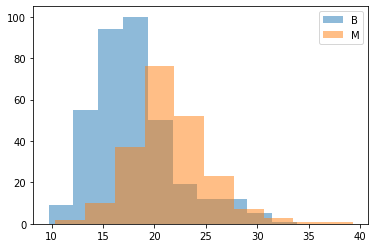

In [15]:
plt.hist(benign['texture_mean'], alpha=.5, label='B')
plt.hist(malign['texture_mean'], alpha=.5, label='M')
plt.legend(loc='upper right')
plt.show()

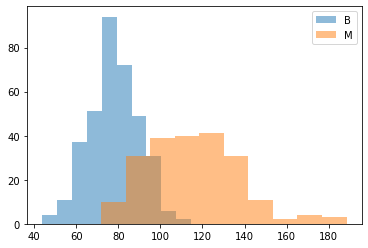

In [16]:
plt.hist(benign['perimeter_mean'], alpha=.5, label='B')
plt.hist(malign['perimeter_mean'], alpha=.5, label='M')
plt.legend(loc='upper right')
plt.show()

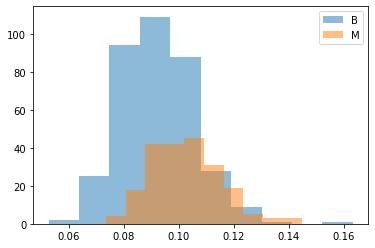

In [17]:
plt.hist(benign['smoothness_mean'], alpha=.5, label='B')
plt.hist(malign['smoothness_mean'], alpha=.5, label='M')
plt.legend(loc='upper right')
plt.show()

In [18]:
# We can come back to this when we want to tweak the features for improvements

In [19]:
# check for any negative values in df
(df < 0).values.any()

False

In [20]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a MinMaxScaler instance since all values are positive to try for better results
scaler = MinMaxScaler()

# Fit the MinMaxScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [22]:
#  Trial one: Logistic Regression Algorithm raw
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 78, max_iter=10000)
lr.fit(X_train, y_train)

print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.9577464788732394
Testing Data Score: 0.9300699300699301


In [23]:
#  Trial two: Random Forest Classifier raw
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=78, n_estimators=200).fit(X_train_scaled, y_train)

print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.965034965034965


In [33]:
y_pred_rfc = rfc.predict(X_test_scaled)

In [35]:
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test, y_pred_rfc)

In [36]:
cm_rfc

array([[80,  4],
       [ 1, 58]], dtype=int64)

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation ="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 248       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 0.6935 - accuracy: 0.5563
Epoch 2/100
14/14 [==============================] - 0s 982us/step - loss: 0.6907 - accuracy: 0.6362
Epoch 3/100
14/14 [==============================] - 0s 962us/step - loss: 0.6892 - accuracy: 0.6408
Epoch 4/100
14/14 [==============================] - 0s 894us/step - loss: 0.6876 - accuracy: 0.6432
Epoch 5/100
14/14 [==============================] - 0s 962us/step - loss: 0.6862 - accuracy: 0.6432
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.6432
Epoch 7/100
14/14 [==============================] - 0s 963us/step - loss: 0.6832 - accuracy: 0.6432
Epoch 8/100
14/14 [==============================] - 0s 992us/step - loss: 0.6817 - accuracy: 0.6432
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.6432
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6775 - accuracy: 0.64

14/14 [==============================] - 0s 885us/step - loss: 0.0995 - accuracy: 0.9671
Epoch 83/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0979 - accuracy: 0.9695
Epoch 84/100
14/14 [==============================] - 0s 885us/step - loss: 0.0969 - accuracy: 0.9695
Epoch 85/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0963 - accuracy: 0.9742
Epoch 86/100
14/14 [==============================] - 0s 962us/step - loss: 0.0954 - accuracy: 0.9718
Epoch 87/100
14/14 [==============================] - 0s 962us/step - loss: 0.0948 - accuracy: 0.9718
Epoch 88/100
14/14 [==============================] - 0s 963us/step - loss: 0.0938 - accuracy: 0.9718
Epoch 89/100
14/14 [==============================] - 0s 886us/step - loss: 0.0927 - accuracy: 0.9742
Epoch 90/100
14/14 [==============================] - 0s 925us/step - loss: 0.0933 - accuracy: 0.9648
Epoch 91/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0918 - accuracy: 0.9671

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.1452 - accuracy: 0.9371 - 156ms/epoch - 31ms/step
Loss: 0.1451791375875473, Accuracy: 0.9370629191398621
